# Cross validation and ratio split

An example of prediction task using `Asso` with k-fold `CrossValidation` and `RatioSplit` on `MovieLensData`.

In [6]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


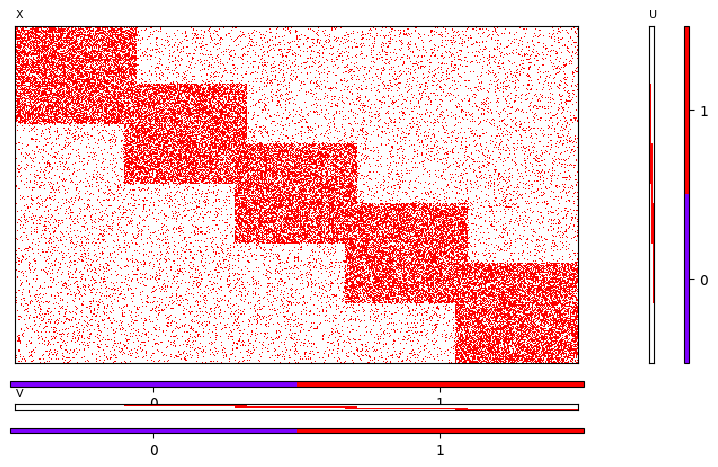

<Figure size 640x480 with 0 Axes>

In [7]:
# generating synthetic data

from PyBMF.generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix(scaling=0.5)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


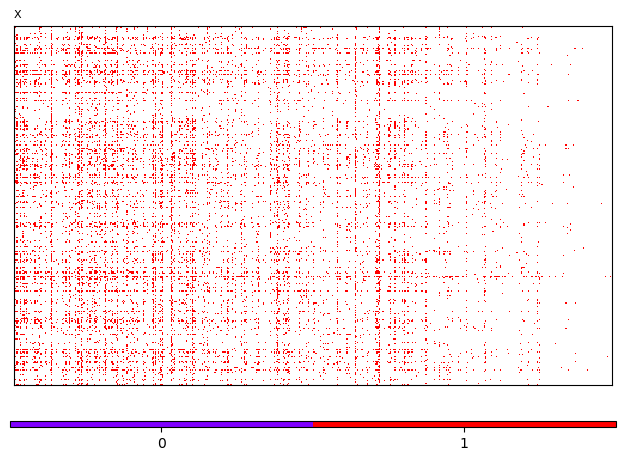

<Figure size 640x480 with 0 Axes>

In [8]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

# 1. `Asso` with `CrossValidation`

In [9]:
from PyBMF.datasets import CrossValidation

n_folds = 3

cv = CrossValidation(X=data.X, test_size=0.2, n_folds=n_folds, seed=1997)
cv.negative_sample(
    train_val_size=cv.pos_train_val_size, 
    test_size=cv.pos_test_size, 
    seed=2023, type='popularity')

[I] CrossValidation, sampling positives
[I]   seed         : 1997
[I]   n_folds      : 3
[I]   partition    : [0, 2868, 5736, 8603]
[I]   train + val  : 8603
[I]   test_size    : 2151
[I] CrossValidation, sampling negatives
[I]   seed         : 2023
[I]   n_folds      : 3
[I]   partition    : [0, 2868, 5736, 8603]
[I]   train + val  : 8603
[I]   test_size    : 2151


[I] CrossValidation, current fold : 0
[I] CrossValidation, get indices for current fold
[I]   current fold         : 0
[I]   current train size   : 5735
[I]   current val size     : 2868
[I]   fold size            : (5735, 2868, 2151)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 0
[I]   current train size   : 5735
[I]   current val size     : 2868
[I]   fold neg sample size : (5735, 2868, 2151)
[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] name         : 2024-07-25 05-26-46-190277 Asso


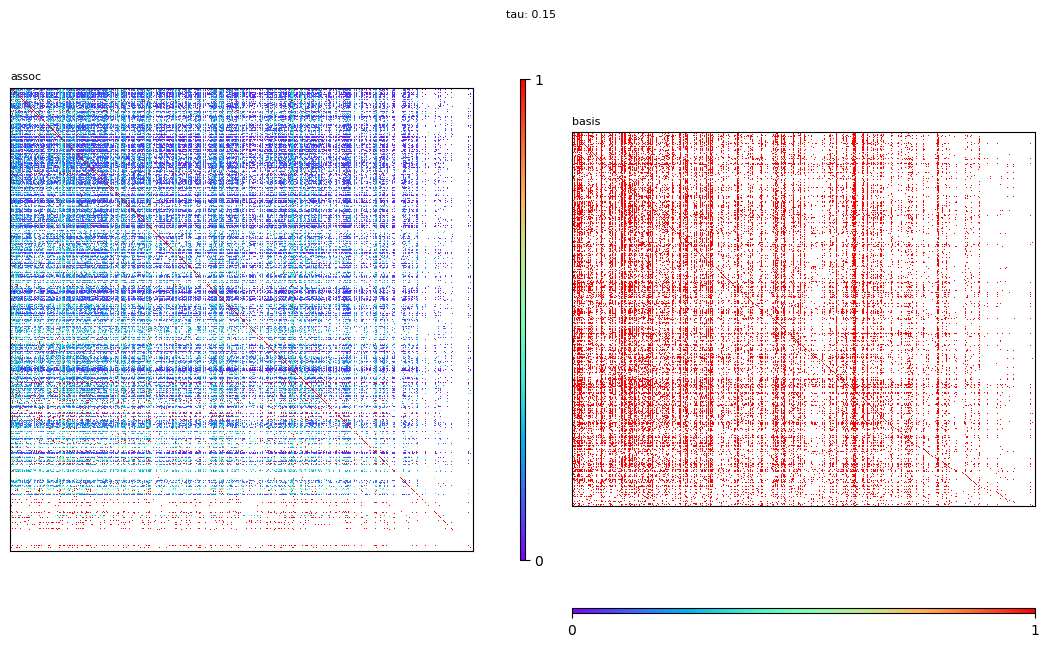

100%|██████████| 5/5 [00:08<00:00,  1.75s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  9s


<Figure size 640x480 with 0 Axes>

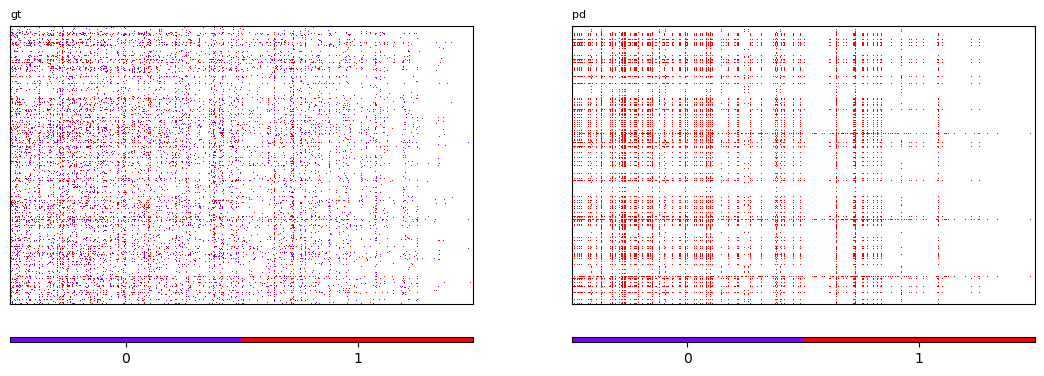

train                                                \
                              0                                                 
                time  k   score score_0.5 desc_len      shape    TP       TPR   
0  25/07/24 05:26:48  0   660.8   -1012.0   7909.0   [82, 68]  1776  0.309677   
1  25/07/24 05:26:49  1   815.4   -1357.5   8720.0  [101, 19]  2264  0.394769   
2  25/07/24 05:26:51  2   920.8   -1545.5   9236.0  [17, 123]  2565  0.447254   
3  25/07/24 05:26:53  3   982.0   -1608.5   9547.0   [3, 182]  2709  0.472363   
4  25/07/24 05:26:55  4  1034.6   -1685.5   9757.0   [44, 12]  2848  0.496600   

                                                                           \
                                                                            
     FP       FPR    FN       FNR       ERR       ACC    Recall Precision   
0  3800  0.026340  3959  0.690323  0.051727  0.948273  0.309677  0.318508   
1  4979  0.034513  3471  0.605231  0.056333  0.943667  0.394769  0.312578   
2  5656  0.039206  3170  0.552746  0.058840  0.941160  0.447254  0.312006   
3  5926  0.041077  3026  0.527637  0.059680  0.940320  0.472363  0.313723   
4  6219  0.043108  2887  0.503400  0.060707  0.939293  0.496600  0.314106   

              val                                                      \
                0                                                       
         F1    TP       TPR    FP       FPR    FN       FNR       ERR   
0  0.314031   754  0.262901  4822  0.032773  2114  0.737099  0.046240   
1  0.348898   908  0.316597  6335  0.043057  1960  0.683403  0.055300   
2  0.367584  1024  0.357043  7197  0.048915  1844  0.642957  0.060273   
3  0.377035  1050  0.366109  7585  0.051552  1818  0.633891  0.062687   
4  0.384813  1099  0.383194  7968  0.054155  1769  0.616806  0.064913   

                                          test                            \
                                             0                             
        ACC    Recall Precision        F1   TP       TPR    FP       FPR   
0  0.953760  0.262901  0.135222  0.178588  592  0.275221  4984  0.033710   
1  0.944700  0.316597  0.125362  0.179606  705  0.327755  6538  0.044221   
2  0.939727  0.357043  0.124559  0.184688  791  0.367736  7430  0.050254   
3  0.937313  0.366109  0.121598  0.182561  821  0.381683  7814  0.052851   
4  0.935087  0.383194  0.121209  0.184164  854  0.397025  8213  0.055550   

                                                                     
                                                                     
     FN       FNR       ERR       ACC    Recall Precision        F1  
0  1559  0.724779  0.043620  0.956380  0.275221  0.106169  0.153229  
1  1446  0.672245  0.053227  0.946773  0.327755  0.097335  0.150096  
2  1360  0.632264  0.058600  0.941400  0.367736  0.096217  0.152526  
3  1330  0.618317  0.060960  0.939040  0.381683  0.095078  0.152234  
4  1297  0.602975  0.063400  0.936600  0.397025  0.094188  0.152255

[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 5735
[I]   current val size     : 2868
[I]   fold size            : (5735, 2868, 2151)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 5735
[I]   current val size     : 2868
[I]   fold neg sample size : (5735, 2868, 2151)
[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] name         : 2024-07-25 05-26-56-106177 Asso


<Figure size 640x480 with 0 Axes>

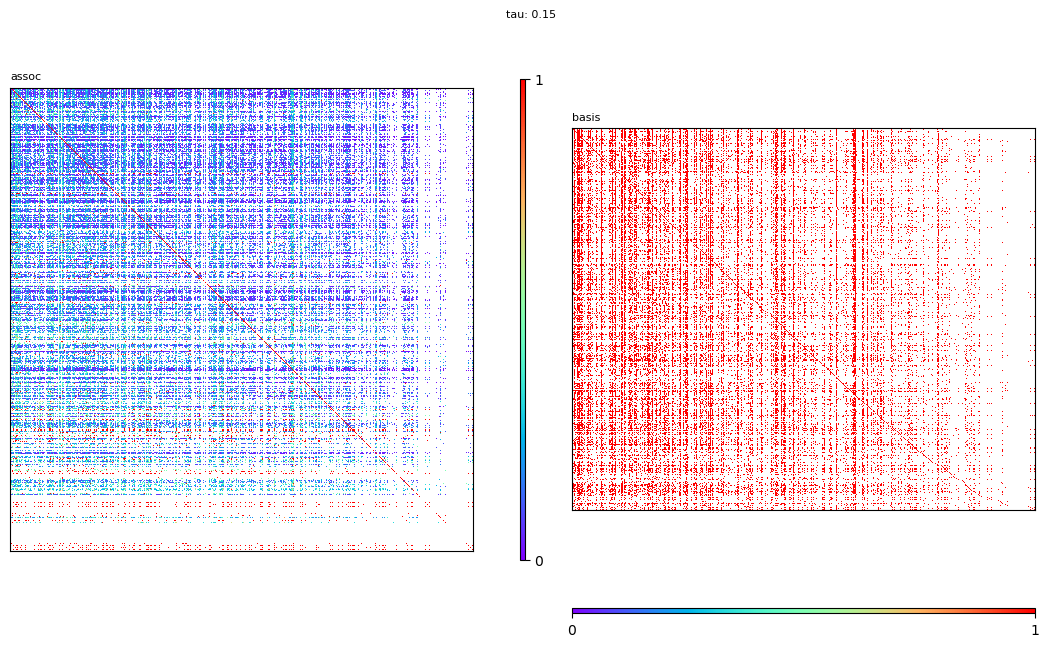

100%|██████████| 5/5 [00:08<00:00,  1.61s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  8s


<Figure size 640x480 with 0 Axes>

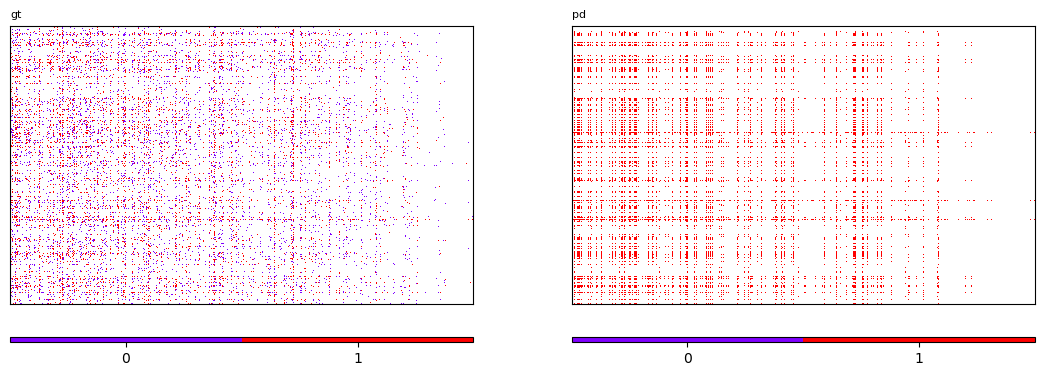

train                                                \
                             0                                                 
                time  k  score score_0.5 desc_len      shape    TP       TPR   
0  25/07/24 05:26:58  0  611.8    -978.5   7842.0   [93, 57]  1672  0.291543   
1  25/07/24 05:27:00  1  738.4   -1313.0   8603.0   [44, 48]  2106  0.367219   
2  25/07/24 05:27:01  2  838.0   -1496.0   9108.0  [16, 123]  2394  0.417437   
3  25/07/24 05:27:03  3  896.8   -1535.0   9371.0   [3, 182]  2518  0.439058   
4  25/07/24 05:27:04  4  947.8   -1688.0   9735.0   [29, 29]  2705  0.471665   

                                                                         \
                                                                          
     FP       FPR    FN       FNR      ERR      ACC    Recall Precision   
0  3629  0.025155  4063  0.708457  0.05128  0.94872  0.291543  0.315412   
1  4732  0.032801  3629  0.632781  0.05574  0.94426  0.367219  0.307985   
2  5386  0.037334  3341  0.582563  0.05818  0.94182  0.417437  0.307712   
3  5588  0.038734  3217  0.560942  0.05870  0.94130  0.439058  0.310634   
4  6081  0.042152  3030  0.528335  0.06074  0.93926  0.471665  0.307876   

              val                                                      \
                0                                                       
         F1    TP       TPR    FP       FPR    FN       FNR       ERR   
0  0.303008   781  0.272315  4520  0.030721  2087  0.727685  0.044047   
1  0.335004   959  0.334379  5879  0.039957  1909  0.665621  0.051920   
2  0.354273  1085  0.378312  6695  0.045503  1783  0.621688  0.056520   
3  0.363847  1100  0.383543  7006  0.047617  1768  0.616457  0.058493   
4  0.372564  1145  0.399233  7641  0.051933  1723  0.600767  0.062427   

                                          test                            \
                                             0                             
        ACC    Recall Precision        F1   TP       TPR    FP       FPR   
0  0.955953  0.272315  0.147331  0.191211  564  0.262204  4737  0.032039   
1  0.948080  0.334379  0.140246  0.197610  683  0.317527  6155  0.041630   
2  0.943480  0.378312  0.139460  0.203794  763  0.354719  7017  0.047461   
3  0.941507  0.383543  0.135702  0.200474  772  0.358903  7334  0.049605   
4  0.937573  0.399233  0.130321  0.196499  809  0.376104  7977  0.053954   

                                                                     
                                                                     
     FN       FNR       ERR       ACC    Recall Precision        F1  
0  1587  0.737796  0.042160  0.957840  0.262204  0.106395  0.151369  
1  1468  0.682473  0.050820  0.949180  0.317527  0.099883  0.151964  
2  1388  0.645281  0.056033  0.943967  0.354719  0.098072  0.153660  
3  1379  0.641097  0.058087  0.941913  0.358903  0.095238  0.150531  
4  1342  0.623896  0.062127  0.937873  0.376104  0.092078  0.147938

[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 5736
[I]   current val size     : 2867
[I]   fold size            : (5736, 2867, 2151)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 5736
[I]   current val size     : 2867
[I]   fold neg sample size : (5736, 2867, 2151)
[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] name         : 2024-07-25 05-27-05-341025 Asso


<Figure size 640x480 with 0 Axes>

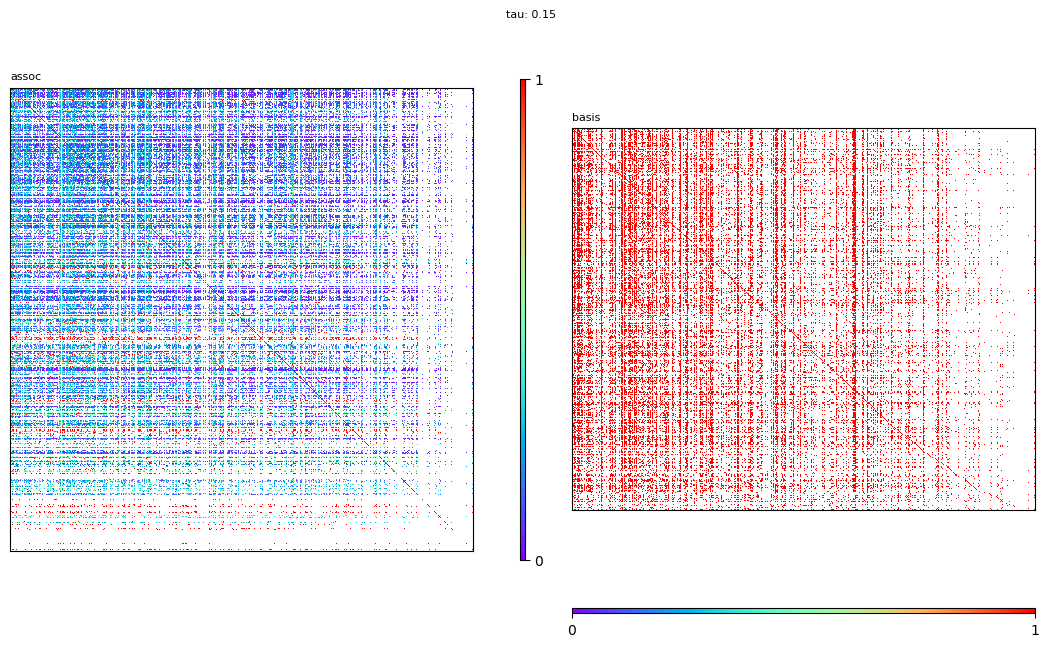

100%|██████████| 5/5 [00:07<00:00,  1.54s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  8s


<Figure size 640x480 with 0 Axes>

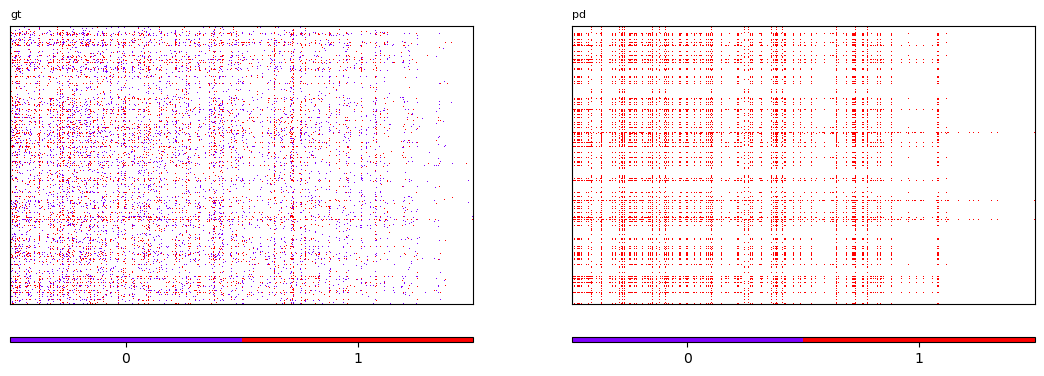

train                                                \
                             0                                                 
                time  k  score score_0.5 desc_len      shape    TP       TPR   
0  25/07/24 05:27:07  0  607.8   -1011.0   7905.0   [76, 71]  1687  0.294107   
1  25/07/24 05:27:09  1  741.4   -1343.0   8676.0   [88, 19]  2131  0.371513   
2  25/07/24 05:27:10  2  857.2   -1500.5   9135.0  [13, 131]  2429  0.423466   
3  25/07/24 05:27:12  3  930.0   -1530.0   9366.0   [3, 169]  2570  0.448047   
4  25/07/24 05:27:13  4  987.4   -1617.5   9634.0   [13, 80]  2724  0.474895   

                                                                           \
                                                                            
     FP       FPR    FN       FNR       ERR       ACC    Recall Precision   
0  3709  0.025710  4049  0.705893  0.051720  0.948280  0.294107  0.312639   
1  4817  0.033390  3605  0.628487  0.056147  0.943853  0.371513  0.306707   
2  5430  0.037639  3307  0.576534  0.058247  0.941753  0.423466  0.309072   
3  5630  0.039026  3166  0.551953  0.058640  0.941360  0.448047  0.313415   
4  5959  0.041306  3012  0.525105  0.059807  0.940193  0.474895  0.313716   

              val                                                      \
                0                                                       
         F1    TP       TPR    FP       FPR    FN       FNR       ERR   
0  0.303090   747  0.260551  4649  0.031597  2120  0.739449  0.045127   
1  0.336014   893  0.311475  6055  0.041153  1974  0.688525  0.053527   
2  0.357337   996  0.347401  6863  0.046645  1871  0.652599  0.058227   
3  0.368829  1020  0.355773  7180  0.048799  1847  0.644227  0.060180   
4  0.377835  1058  0.369027  7625  0.051824  1809  0.630973  0.062893   

                                          test                            \
                                             0                             
        ACC    Recall Precision        F1   TP       TPR    FP       FPR   
0  0.954873  0.260551  0.138436  0.180806  572  0.265923  4824  0.032628   
1  0.946473  0.311475  0.128526  0.181966  670  0.311483  6278  0.042462   
2  0.941773  0.347401  0.126734  0.185717  734  0.341237  7125  0.048191   
3  0.939820  0.355773  0.124390  0.184332  741  0.344491  7459  0.050450   
4  0.937107  0.369027  0.121847  0.183203  789  0.366806  7894  0.053392   

                                                                     
                                                                     
     FN       FNR       ERR       ACC    Recall Precision        F1  
0  1579  0.734077  0.042687  0.957313  0.265923  0.106004  0.151583  
1  1481  0.688517  0.051727  0.948273  0.311483  0.096431  0.147269  
2  1417  0.658763  0.056947  0.943053  0.341237  0.093396  0.146653  
3  1410  0.655509  0.059127  0.940873  0.344491  0.090366  0.143175  
4  1362  0.633194  0.061707  0.938293  0.366806  0.090867  0.145653

<Figure size 640x480 with 0 Axes>

In [10]:
from PyBMF.models import Asso

k = 5
tau = 0.15
w_fp = 0.2

for fold in range(n_folds):
    # get current fold
    cv.get_fold(current_fold=fold)
    
    X_train, X_val, X_test = cv.X_train, cv.X_val, cv.X_test

    model = Asso(k=k, tau=tau, w_fp=w_fp)
    model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False, save_model=False)

# 2. `Asso` with `RatioSplit`

In [11]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997


[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] name         : 2024-07-25 05-27-14-575745 Asso


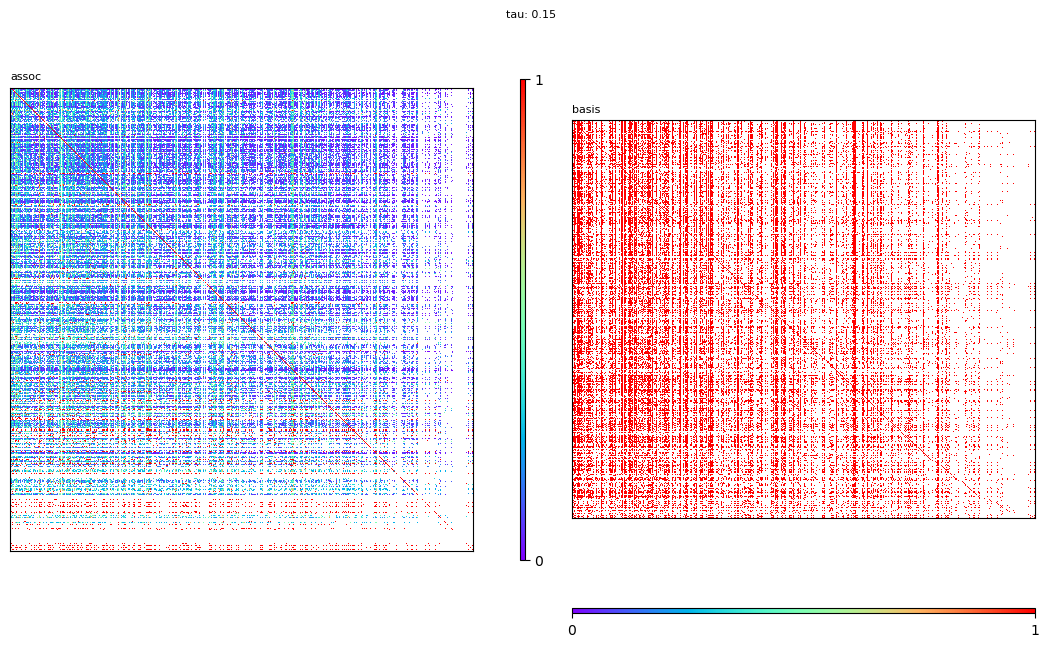

100%|██████████| 5/5 [00:08<00:00,  1.65s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  8s


<Figure size 640x480 with 0 Axes>

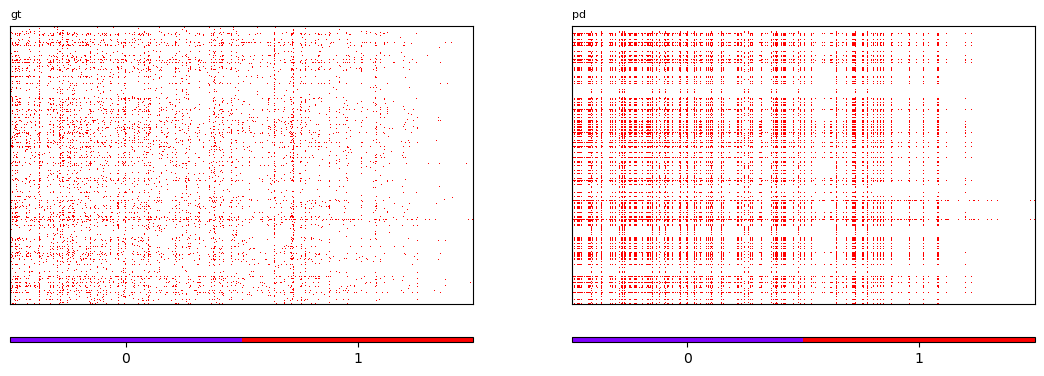

train                                                \
                              0                                                 
                time  k   score score_0.5 desc_len      shape    TP       TPR   
0  25/07/24 05:27:16  0  1219.0   -1541.0  10801.0  [100, 92]  3059  0.406404   
1  25/07/24 05:27:18  1  1422.0   -2046.0  11940.0  [100, 29]  3734  0.496081   
2  25/07/24 05:27:20  2  1572.4   -2270.0  12574.0  [16, 170]  4134  0.549223   
3  25/07/24 05:27:21  3  1638.8   -2413.0  12973.0   [25, 88]  4340  0.576591   
4  25/07/24 05:27:23  4  1698.6   -2416.5  13189.0   [2, 207]  4442  0.590142   

                                                                           \
                                                                            
     FP       FPR    FN       FNR       ERR       ACC    Recall Precision   
0  6141  0.043103  4468  0.593596  0.070727  0.929273  0.406404  0.332500   
1  7826  0.054930  3793  0.503919  0.077460  0.922540  0.496081  0.323010   
2  8674  0.060882  3393  0.450777  0.080447  0.919553  0.549223  0.322767   
3  9166  0.064335  3187  0.423409  0.082353  0.917647  0.576591  0.321339   
4  9275  0.065100  3085  0.409858  0.082400  0.917600  0.590142  0.323832   

             val                                                      \
               0                                                       
         F1   TP       TPR     FP       FPR   FN       FNR       ERR   
0  0.365756  429  0.398699   8771  0.058896  647  0.601301  0.062787   
1  0.391261  499  0.463755  11061  0.074273  577  0.536245  0.077587   
2  0.406590  539  0.500929  12269  0.082384  537  0.499071  0.085373   
3  0.412685  559  0.519517  12947  0.086937  517  0.480483  0.089760   
4  0.418189  565  0.525093  13152  0.088314  511  0.474907  0.091087   

                                           test                             \
                                              0                              
        ACC    Recall Precision        F1    TP       TPR     FP       FPR   
0  0.937213  0.398699  0.046630  0.083496   833  0.387262   8367  0.056592   
1  0.922413  0.463755  0.043166  0.078981   972  0.451883  10588  0.071614   
2  0.914627  0.500929  0.042083  0.077643  1049  0.487680  11759  0.079534   
3  0.910240  0.519517  0.041389  0.076670  1113  0.517434  12393  0.083822   
4  0.908913  0.525093  0.041190  0.076387  1116  0.518828  12601  0.085229   

                                                                     
                                                                     
     FN       FNR       ERR       ACC    Recall Precision        F1  
0  1318  0.612738  0.064567  0.935433  0.387262  0.090543  0.146771  
1  1179  0.548117  0.078447  0.921553  0.451883  0.084083  0.141784  
2  1102  0.512320  0.085740  0.914260  0.487680  0.081902  0.140250  
3  1038  0.482566  0.089540  0.910460  0.517434  0.082408  0.142173  
4  1035  0.481172  0.090907  0.909093  0.518828  0.081359  0.140660

<Figure size 640x480 with 0 Axes>

In [12]:
from PyBMF.models import Asso

k = 5
tau = 0.15
w_fp = 0.2

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False, save_model=False)